In [1]:
# This document demonstrates my ability for linear regression and  polynomial regressions analysis.

In [2]:
# Import libraries
import pandas as pd  
import matplotlib.pyplot as plt

# Ingest data from csv
df = pd.read_csv(
    "assets/Business_employment_data.csv", index_col=0
)  # Read csv into a dataframe
df.head()  # Display outputs

,series_reference,region_name,filled jobs,filled jobs revised,filled jobs diff,filled jobs % diff,total_earnings,total earnings revised,earnings diff,earnings % diff
period,,,,,,,,,,
2020.09,BDCQ.SED1RA,Northland,65520,65904,384,0.6,953,959,6,0.6
2020.09,BDCQ.SED1RB,Auckland,708372,714506,6134,0.9,12420,12530,110,0.9
2020.09,BDCQ.SED1RC,Waikato,198776,200265,1489,0.7,3041,3058,17,0.6
2020.09,BDCQ.SED1RD,Bay of Plenty,127323,128540,1217,1.0,1881,1899,18,1.0
2020.09,BDCQ.SED1RE,Gisborne,20417,20632,215,1.1,276,279,3,1.1


In [3]:
# Based on our previous analysis, we can see some sort of regression relationship between 'filled_jobs' and 'total_earnings.' 
# In this file, let's further analyze this regression relationship. 

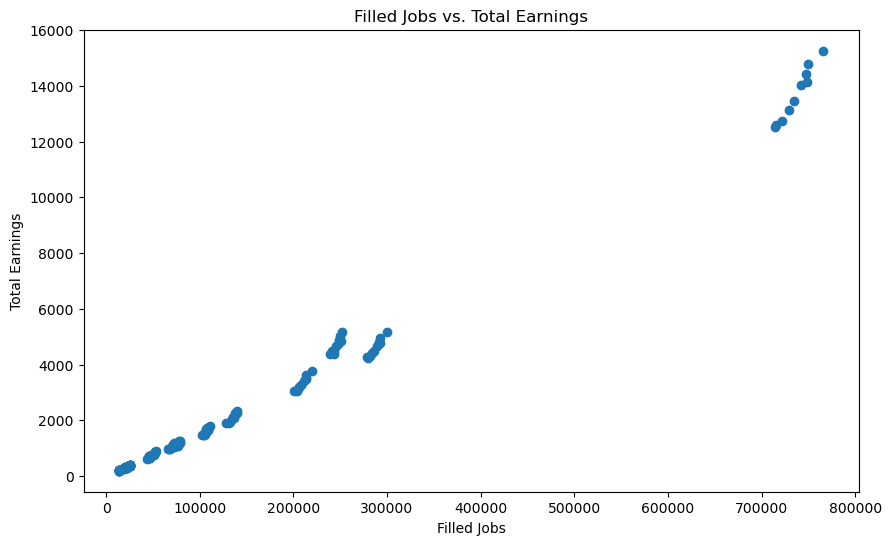

In [4]:
df['filled_jobs'] = pd.to_numeric(df['filled jobs revised'], errors='coerce')
df['total_earnings'] = pd.to_numeric(df['total earnings revised'], errors='coerce')

# A scatter plot of filled jobs vs. total earnings using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['filled_jobs'], df['total_earnings'])
plt.title('Filled Jobs vs. Total Earnings')
plt.xlabel('Filled Jobs')
plt.ylabel('Total Earnings')
plt.show()

In [5]:
# Data cleaning
df = df.drop_duplicates() 
df['filled_jobs'].fillna(df['filled_jobs'].mean(), inplace=True) # Fill missing values
df['total_earnings'].fillna(df['filled_jobs'].mean(), inplace=True)
df.head

<bound method NDFrame.head of         series_reference    region_name  filled jobs  filled jobs revised  \
period                                                                      
2020.09      BDCQ.SED1RA      Northland        65520                65904   
2020.09      BDCQ.SED1RB       Auckland       708372               714506   
2020.09      BDCQ.SED1RC        Waikato       198776               200265   
2020.09      BDCQ.SED1RD  Bay of Plenty       127323               128540   
2020.09      BDCQ.SED1RE       Gisborne        20417                20632   
...                  ...            ...          ...                  ...   
2022.12      BDCQ.SED1RL    Marlborough        25707                25909   
2022.12      BDCQ.SED1RM     West Coast        14315                14347   
2022.12      BDCQ.SED1RN     Canterbury       296998               299921   
2022.12      BDCQ.SED1RO          Otago       109243               110509   
2022.12      BDCQ.SED1RP      Southland       

In [6]:
# Let's try a LinearRegression model first.

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
import math

# Build regression model
X = df[['filled_jobs']]
y = df['total_earnings']
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate RMSE
rmse = math.sqrt(mse)

print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Intercept: -226.4979245684035
Coefficient: [0.01861335]
R-squared: 0.9927449423506597
Mean Squared Error: 78026.16629123622
Root Mean Squared Error: 279.331642123187


In [7]:
# Based on the high R-squared value and relatively low MSE and RMSE values, it can be inferred that the Linear Regression model is performing ok.
# But do we have other models to fit the data? Let's try polynomial regressions

In [8]:
# Polynomial regressions with degree 2
# Import the necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import math

# Build the regression model
X = df[['filled_jobs']]
y = df['total_earnings']

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Make predictions
y_pred = model.predict(X_poly)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print the results
print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Intercept: -59.59229589030838
Coefficients: [0.00000000e+00 1.60848525e-02 3.59120747e-09]
R-squared: 0.9946473818491617
Mean Squared Error: 57565.948351736355
Root Mean Squared Error: 239.92904857840026


In [9]:
# Polynomial regressions with degree 3
# Import the necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import math

# Build the regression model
X = df[['filled_jobs']]
y = df['total_earnings']

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Make predictions
y_pred = model.predict(X_poly)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Print the results
print('R-squared:', r2)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Intercept: -97.92309683321673
Coefficients: [ 0.00000000e+00  1.72483564e-02 -2.15428715e-09  5.75316277e-15]
R-squared: 0.9946916711998823
Mean Squared Error: 57089.62846411002
Root Mean Squared Error: 238.93436015799406


In [10]:
# Based on output metrics, the polynomial regression models seem to be better than the linear regression model.
# Let's find the best degree for polynomial regression models

In [11]:
from sklearn.model_selection import cross_val_score

degrees = [2, 3, 4, 5, 6, 7, 8]  # List of degrees to try
cv_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

best_degree = degrees[cv_scores.index(max(cv_scores))]
print('Best degree:', best_degree)

Best degree: 4


In [12]:
# Thank you for sparing your valuable time.
# Data download from https://www.stats.govt.nz/large-datasets/csv-files-for-download/ "Business employment data: March 2023 quarter – regional council revisions – CSV"